In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
# !curl -L -o diamonds-price-dataset.zip https://www.kaggle.com/api/v1/datasets/download/amirhosseinmirzaie/diamonds-price-dataset
# !unzip diamonds-price-dataset.zip

# Dataset & feature selection

In [ ]:
N = 400
df = pd.read_csv('diamonds.csv').sample(n=N, random_state=SEED)

print("Shape:", df.shape)
df.head()

Shape: (400, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
33553,0.61,Good,G,I1,61.2,57.2,931,5.44,5.49,3.34
9427,0.91,Good,G,VS1,64.1,60.0,4744,6.11,6.06,3.90
199,0.77,Ideal,H,SI1,62.2,56.0,2781,5.83,5.88,3.64
12447,1.13,Very Good,I,VS2,60.7,58.0,5531,6.72,6.75,4.09
39489,0.32,Good,H,VS2,63.1,55.0,505,4.33,4.36,2.74


Features chosen: `x`, `y`, `z`, `table`, `depth` and `carat`. All of these features describe the size of a diamond.

In [ ]:
data = df[['x', 'y', 'z', 'table', 'depth', 'carat']]

data.head()

,x,y,z,table,depth,carat
33553,5.44,5.49,3.34,57.2,61.2,0.61
9427,6.11,6.06,3.90,60.0,64.1,0.91
199,5.83,5.88,3.64,56.0,62.2,0.77
12447,6.72,6.75,4.09,58.0,60.7,1.13
39489,4.33,4.36,2.74,55.0,63.1,0.32


In [ ]:
data.describe()

,x,y,z,table,depth,carat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,5.663400,5.665550,3.489300,57.504250,61.609750,0.76910
std,1.126584,1.116961,0.693352,2.051103,1.460072,0.46942
min,3.840000,3.890000,2.380000,53.000000,57.100000,0.23000
25%,4.660000,4.665000,2.870000,56.000000,60.800000,0.38000
50%,5.660000,5.660000,3.490000,57.000000,61.700000,0.70000
75%,6.490000,6.502500,4.020000,59.000000,62.400000,1.02250
max,9.100000,8.970000,5.670000,65.000000,68.600000,3.01000


In [ ]:
data.corr()

,x,y,z,table,depth,carat
x,1.000000,0.998954,0.991859,0.195853,-0.023730,0.974184
y,0.998954,1.000000,0.991165,0.192414,-0.029630,0.973208
z,0.991859,0.991165,1.000000,0.156844,0.099429,0.973168
table,0.195853,0.192414,0.156844,1.000000,-0.297417,0.197204
depth,-0.023730,-0.029630,0.099429,-0.297417,1.000000,0.028023
carat,0.974184,0.973208,0.973168,0.197204,0.028023,1.000000


# Data standardization

In [ ]:
means = data.mean(axis=0)
means

,0
x,5.66340
y,5.66555
z,3.48930
table,57.50425
depth,61.60975
carat,0.76910


In [ ]:
stds = data.std(axis=0)
stds

,0
x,1.126584
y,1.116961
z,0.693352
table,2.051103
depth,1.460072
carat,0.469420


In [ ]:
ranges = data.max(axis=0) - data.min(axis=0)
ranges

,0
x,5.26
y,5.08
z,3.29
table,12.00
depth,11.50
carat,2.78


In [ ]:
# Z-score normalization
data_zs = (data - means) / stds

# Range normalization
data_rd = (data - means) / ranges

# Ranking normalization
data_rn = 100.0 * (data - data.min(axis=0)) / ranges

In [ ]:
# Performing singular value decomposition
uzs, szs, vzs = np.linalg.svd(data_zs)
urd, srd, vrd = np.linalg.svd(data_rd)
urn, srn, vrn = np.linalg.svd(data_rn)
uns, snss, vns = np.linalg.svd(data)

print("Singular values for z-score normalization:", szs.round(1))
print("Singular values for range normalization:", srd.round(1))
print("Singular values for ranking normalization:", srn.round(1))
print("Singular values for no standardization:", snss.round(1))

Singular values for z-score normalization: [39.9 22.6 16.5  3.8  0.6  0.4]
Singular values for range normalization: [8.2 3.5 2.3 0.7 0.1 0.1]
Singular values for ranking normalization: [1794.6  505.8  343.3   77.4   25.9   13.8]
Singular values for no standardization: [1694.9   41.3   34.3    2.2    1.     0.7]


In [ ]:
contrib_zs = np.square(szs)
contrib_rd = np.square(srd)
contrib_rn = np.square(srn)
contrib_ns = np.square(snss)

print("PC natural contributions (z-score normalization):", contrib_zs.round(2))
print("PC natural contributions (range normalization):", contrib_rd.round(2))
print("PC natural contributions (ranking normalization):", contrib_rn.round(2))
print("PC natural contributions (no standardization):", contrib_ns.round(2))

PC natural contributions (z-score normalization): [1594.93  512.65  271.48   14.4     0.4     0.14]
PC natural contributions (range normalization): [66.5  12.38  5.43  0.45  0.02  0.01]
PC natural contributions (ranking normalization): [3220431.16  255844.96  117845.97    5992.18     672.25     189.67]
PC natural contributions (no standardization): [2872698.57    1706.5     1177.21       4.99       1.09       0.5 ]


In [ ]:
ds_zs = np.square(data_zs).to_numpy().sum()
ds_rd = np.square(data_rd).to_numpy().sum()
ds_rn = np.square(data_rn).to_numpy().sum()
ds_ns = np.square(data).to_numpy().sum()

print("Data scatter by definition (z-score normalization): %.4f" % ds_zs)
print("Data scatter by definition (range normalization): %.4f" % ds_rd)
print("Data scatter by definition (ranking normalization): %.4f" % ds_rn)
print("Data scatter by definition (no standardization): %.4f" % ds_ns)

Data scatter by definition (z-score normalization): 2394.0000
Data scatter by definition (range normalization): 84.7789
Data scatter by definition (ranking normalization): 3600976.1901
Data scatter by definition (no standardization): 2875588.8702


In [ ]:
ds_contib_zs = contrib_zs.sum()
ds_contib_rd = contrib_rd.sum()
ds_contib_rn = contrib_rn.sum()
ds_contib_ns = contrib_ns.sum()

print("Data scatter from contributions (z-score normalization): %.4f" % ds_contib_zs)
print("Data scatter from contributions (range normalization): %.4f" % ds_contib_rd)
print("Data scatter from contributions (ranking normalization): %.4f" % ds_contib_rn)
print("Data scatter from contributions (no standardization): %.4f" % ds_contib_ns)

Data scatter from contributions (z-score normalization): 2394.0000
Data scatter from contributions (range normalization): 84.7789
Data scatter from contributions (ranking normalization): 3600976.1901
Data scatter from contributions (no standardization): 2875588.8702


From the results one can see that the calculated data scatter is the same for all versions of standardization, which is consistent with the theory.

In [ ]:
contrib_zs_percent = 100.0 * contrib_zs / ds_zs
contrib_rd_percent = 100.0 * contrib_rd / ds_rd
contrib_rn_percent = 100.0 * contrib_rn / ds_rn
contrib_ns_percent = 100.0 * contrib_ns / ds_ns

print("PC percentage contributions (z-score normalization):", contrib_zs_percent.round(2))
print("PC percentage contributions (range normalization):", contrib_rd_percent.round(2))
print("PC percentage contributions (ranking normalization):", contrib_rn_percent.round(2))
print("PC percentage contributions (no standardization):", contrib_ns_percent.round(2))

PC percentage contributions (z-score normalization): [66.62 21.41 11.34  0.6   0.02  0.01]
PC percentage contributions (range normalization): [78.43 14.6   6.4   0.53  0.02  0.01]
PC percentage contributions (ranking normalization): [89.43  7.1   3.27  0.17  0.02  0.01]
PC percentage contributions (no standardization): [99.9   0.06  0.04  0.    0.    0.  ]


In [ ]:
for i in range(6):
    x_arrstr = np.char.mod('%.3f', vrn[i].round(3))
    #combine to a string
    print(" & ".join(x_arrstr))

-0.446 & -0.452 & -0.436 & -0.409 & -0.408 & -0.270
-0.288 & -0.306 & -0.268 & 0.558 & 0.586 & -0.310
-0.021 & -0.025 & 0.091 & -0.718 & 0.689 & -0.023
0.296 & 0.322 & 0.048 & -0.061 & -0.079 & -0.893
0.342 & 0.335 & -0.853 & -0.046 & 0.093 & 0.183
0.716 & -0.697 & 0.010 & -0.005 & -0.010 & -0.012


In [ ]:
vzs

array([[ 0.49823827,  0.49792599,  0.49593875,  0.12289055, -0.00000285,
         0.49271797],
       [ 0.01209018,  0.01041299,  0.10336588, -0.66815574,  0.73555414,
         0.03986112],
       [ 0.07763209,  0.08713309, -0.00347358, -0.73345218, -0.66934454,
         0.01986938],
       [ 0.27995731,  0.29320632,  0.28219545,  0.02230075,  0.01894146,
        -0.86900149],
       [ 0.72965581, -0.68265693, -0.03877301, -0.0039043 ,  0.0000043 ,
        -0.00795786],
       [-0.36716755, -0.43860994,  0.81376321, -0.00107394, -0.10285527,
        -0.00428808]])

Here we see that the contrast between principle component contributions is  starker for range normalization - 78% PC1 contribution for r-standardization vs. 67% PC1 contribution for z-standardization.

Ranking normalization brings PC1 contribution even further up to 89%, closer to the non-standardizaed contribution distribution.

# Principal components visualization

For the purpose of visualizing two first principal components and the differences between them, let us use two features to define two separate groups of dataset instances: `depth` and `carat`.

The first group are diamonds with small depth ratios (< 58.5, as shown below). The second group are diamonds of large weight (> 2.1 carats, as shown below).

## Defining instance groups

Text(0.5, 1.0, 'Depth distribution')

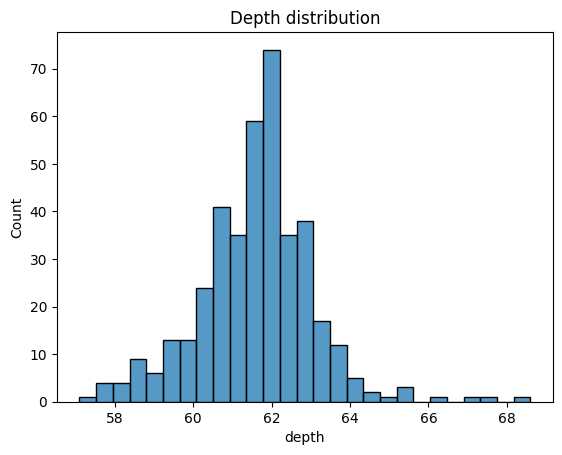

In [ ]:
sns.histplot(data['depth']).set_title('Depth distribution')

In [ ]:
# Diamonds with small depth ratios
depth_group = df[df['depth'] < 58.5]
depth_group.shape

(9, 10)

Text(0.5, 1.0, 'Carat distribution')

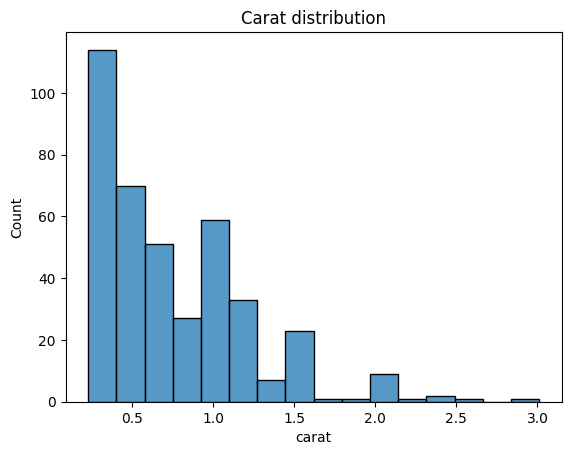

In [ ]:
sns.histplot(data['carat']).set_title('Carat distribution')

In [ ]:
# Diamonds with large weight
carat_group = df[df['carat'] > 2.1]
carat_group.shape

(7, 10)

In [ ]:
depth_group.index.intersection(carat_group.index)

Index([], dtype='int64')

As one can see, the two groups do not overlap.

In [ ]:
carat_group_indices = df.index.get_indexer(carat_group.index.tolist())
depth_group_indices = df.index.get_indexer(depth_group.index.tolist())

## Calculating principal components

### Z-score normalized data PCs

In [ ]:
pcs1_zs = vzs[0]
pcs1_zs

array([ 0.49823827,  0.49792599,  0.49593875,  0.12289055, -0.00000285,
        0.49271797])

Larger loading components are positive, thus the sign for factors remains unchanged.

In [ ]:
pc1_zs = uzs[:, 0] * np.sqrt(szs[0])

In [ ]:
pcs2_zs = vzs[1]
pcs2_zs

array([ 0.01209018,  0.01041299,  0.10336588, -0.66815574,  0.73555414,
        0.03986112])

Larger loading components are negative, thus the sign for factors is changed to negative.

In [ ]:
pc2_zs = uzs[:, 1] * np.sqrt(szs[1])

### Range normalized data PCs

In [ ]:
pcs1_rd = vrd[0]
pcs1_rd

array([0.5235558 , 0.53722342, 0.51310964, 0.09343617, 0.00148823,
       0.40652957])

Larger loading components are positive, thus the sign for factors remains unchanged.

In [ ]:
pc1_rd = urd[:, 0] * np.sqrt(srd[0])

In [ ]:
pcs2_rd = vrd[1]
pcs2_rd

array([ 0.01847519,  0.02043035,  0.10344037, -0.90554671,  0.40974082,
        0.02527818])

Larger loading components are negative, thus the sign for factors is changed to negative.

In [ ]:
pc2_rd = -urd[:, 1] * np.sqrt(srd[1])

## Visualization

<Axes: title={'center': 'PCs - range normalization SVD'}>

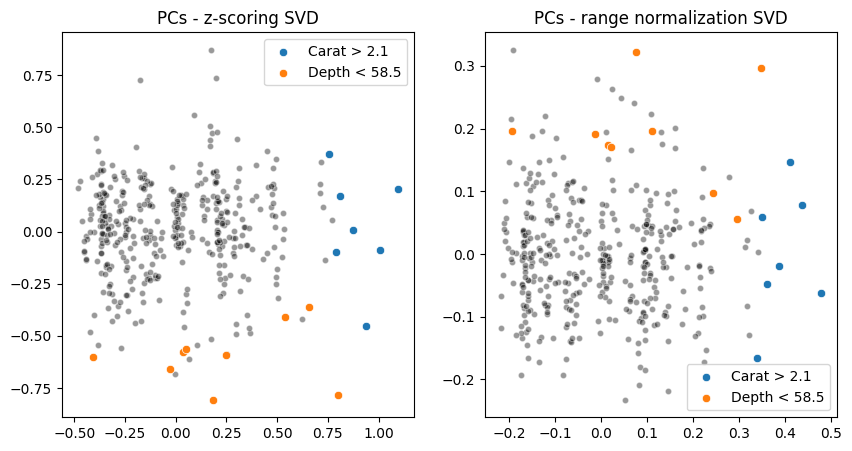

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].set_title('PCs - z-scoring SVD')
sns.scatterplot(x=pc1_zs, y=pc2_zs, s=80, color="black", marker=".", alpha=0.4, ax=axs[0])
sns.scatterplot(x=pc1_zs[carat_group_indices], y=pc2_zs[carat_group_indices], label='Carat > 2.1', ax=axs[0])
sns.scatterplot(x=pc1_zs[depth_group_indices], y=pc2_zs[depth_group_indices], label='Depth < 58.5', ax=axs[0])

axs[1].set_title('PCs - range normalization SVD')
sns.scatterplot(x=pc1_rd, y=pc2_rd, s=80, color="black", marker=".", alpha=0.4, ax=axs[1])
sns.scatterplot(x=pc1_rd[carat_group_indices], y=pc2_rd[carat_group_indices], label='Carat > 2.1', ax=axs[1])
sns.scatterplot(x=pc1_rd[depth_group_indices], y=pc2_rd[depth_group_indices], label='Depth < 58.5', ax=axs[1])

On the resulting plots one can see that overall the visualization for both normalization techniques share many similarities in the overall distribution of instances.

As for the groups, it seems that larger weight in carat coincides with larger values of PC1, while smaller depth ratios coincide with lesser PC2 values. This follows from the observation that both groups seem to denote the outliers in the respective axes.

# Conventional PCA

In [ ]:
# The covariance matrix
cov = (data_zs.T @ data_zs) / (data_zs.shape[0] - 1)
cov

,x,y,z,table,depth,carat
x,1.000000,0.998954,0.991859,0.195853,-0.023730,0.974184
y,0.998954,1.000000,0.991165,0.192414,-0.029630,0.973208
z,0.991859,0.991165,1.000000,0.156844,0.099429,0.973168
table,0.195853,0.192414,0.156844,1.000000,-0.297417,0.197204
depth,-0.023730,-0.029630,0.099429,-0.297417,1.000000,0.028023
carat,0.974184,0.973208,0.973168,0.197204,0.028023,1.000000


In [ ]:
# Performing spectral decomposition
la, c = np.linalg.eig(cov)

In [ ]:
print('Eigenvalues:', la)

Eigenvalues: [3.9973074  1.28484687 0.68039046 0.03609746 0.00101201 0.0003458 ]


In [ ]:
print('Eigenvectors:', c)

Eigenvectors: [[ 0.49823827  0.01209018  0.07763209 -0.27995731 -0.72965581 -0.36716755]
 [ 0.49792599  0.01041299  0.08713309 -0.29320632  0.68265693 -0.43860994]
 [ 0.49593875  0.10336588 -0.00347358 -0.28219545  0.03877301  0.81376321]
 [ 0.12289055 -0.66815574 -0.73345218 -0.02230075  0.0039043  -0.00107394]
 [-0.00000285  0.73555414 -0.66934454 -0.01894146 -0.0000043  -0.10285527]
 [ 0.49271797  0.03986112  0.01986938  0.86900149  0.00795786 -0.00428808]]


The eigenvalues and the corresponding eigen vectors are already correctly ordered. Let us now compute the first two principal components.

In [ ]:
c1 = c[:, 0]

print('Eigenvector 1:', c1)

Eigenvector 1: [ 0.49823827  0.49792599  0.49593875  0.12289055 -0.00000285  0.49271797]


In [ ]:
c2 = c[:, 1]

print('Eigenvector 2:', c2)

Eigenvector 2: [ 0.01209018  0.01041299  0.10336588 -0.66815574  0.73555414  0.03986112]


Largest components in both eigenvectors are positive, thus we don't need to invert the signs on the corresponding factors.

In [ ]:
z1 = (data_zs @ c1) / np.sqrt(la[0] * (data_zs.shape[0] - 1))
z2 = (data_zs @ c2) / np.sqrt(la[1] * (data_zs.shape[0] - 1))

In [ ]:
z1 = z1.to_numpy()
z2 = z2.to_numpy()

<Axes: title={'center': 'PCs - range normalization SVD'}>

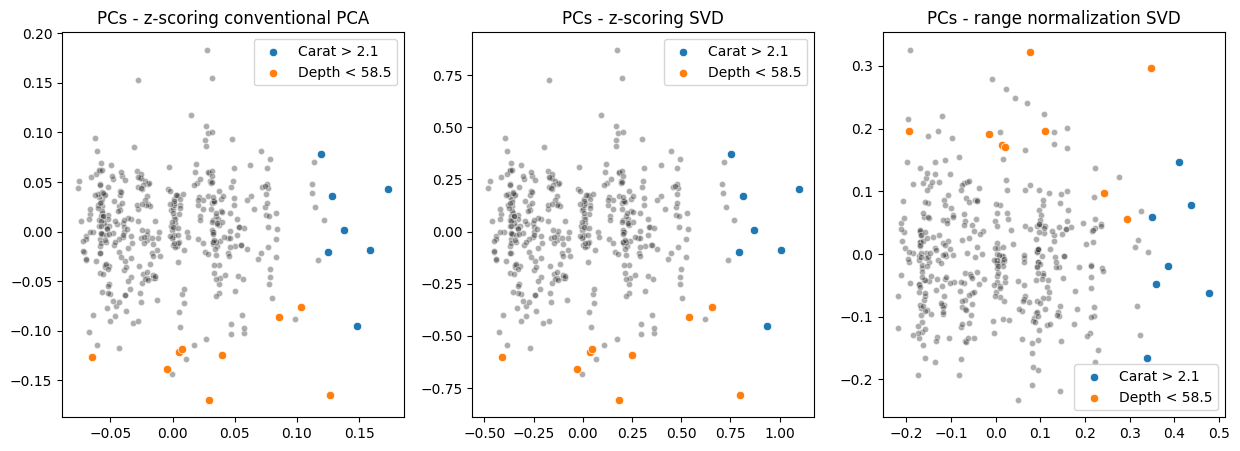

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].set_title('PCs - z-scoring conventional PCA')
sns.scatterplot(x=z1, y=z2, s=80, color=".2", marker=".", ax=axs[0], alpha=0.4)
sns.scatterplot(x=z1[carat_group_indices], y=z2[carat_group_indices], ax=axs[0], label='Carat > 2.1')
sns.scatterplot(x=z1[depth_group_indices], y=z2[depth_group_indices], ax=axs[0], label='Depth < 58.5')

axs[1].set_title('PCs - z-scoring SVD')
sns.scatterplot(x=pc1_zs, y=pc2_zs, s=80, color=".2", marker=".", ax=axs[1], alpha=0.4)
sns.scatterplot(x=pc1_zs[carat_group_indices], y=pc2_zs[carat_group_indices], ax=axs[1], label='Carat > 2.1')
sns.scatterplot(x=pc1_zs[depth_group_indices], y=pc2_zs[depth_group_indices], ax=axs[1], label='Depth < 58.5')

axs[2].set_title('PCs - range normalization SVD')
sns.scatterplot(x=pc1_rd, y=pc2_rd, s=80, color=".2", marker=".", ax=axs[2], alpha=0.4)
sns.scatterplot(x=pc1_rd[carat_group_indices], y=pc2_rd[carat_group_indices], ax=axs[2], label='Carat > 2.1')
sns.scatterplot(x=pc1_rd[depth_group_indices], y=pc2_rd[depth_group_indices], ax=axs[2], label='Depth < 58.5')

The resulting figures are very similar, the differences in coordinates are mostly caused from the use of different normalization techniques.

# Hidden ranking factor

In [ ]:
pcs1_rn = vrn[0]
pcs1_rn

array([-0.44639956, -0.45157731, -0.43595029, -0.40938324, -0.4077707 ,
       -0.26996505])

Larger loading components are negative, thus the sign for factors is changed to negative.

In [ ]:
pcs1_rn = -vrn[0]
pcs1_rn

array([0.44639956, 0.45157731, 0.43595029, 0.40938324, 0.4077707 ,
       0.26996505])

In [ ]:
pc1_rn = -urn[:, 0]

In [ ]:
# Percentage scaling
pc1_rn_m = 100 * pc1_rn / np.max(pc1_rn)

Text(0.5, 1.0, 'Hidden factors, scaled to 0-100')

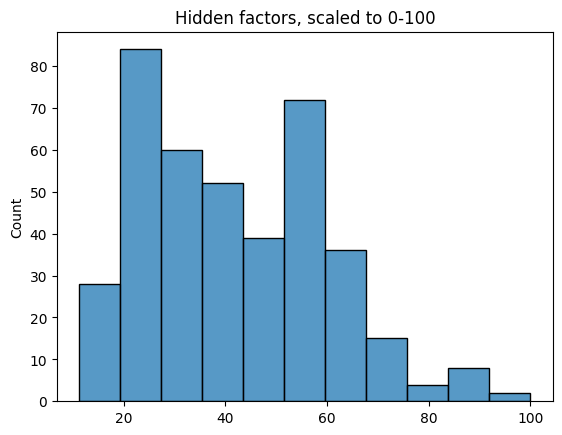

In [ ]:
sns.histplot(pc1_rn_m).set_title("Hidden factors, scaled to 0-100")

Now, let's take the best instances in terms of their hidden factor:

In [352]:
sub_df = df.loc[data.index.tolist()][['x', 'y', 'z', 'carat', 'table', 'depth']]

In [353]:
sub_df['score'] = pc1_rn_m

In [354]:
sub_df.sort_values('score', ascending=False)[:20]

,x,y,z,carat,table,depth,score
17893,9.10,8.97,5.67,3.01,58.0,62.7,100.000000
24669,8.82,8.75,5.45,2.65,61.0,62.0,98.484294
24148,8.85,8.76,5.17,2.41,61.0,58.7,89.666102
21879,8.60,8.56,5.24,2.33,58.0,61.1,86.891979
23537,8.33,8.28,5.21,2.22,58.0,62.7,86.601659
20304,7.89,7.81,5.04,2.00,60.0,64.2,86.520889
24712,7.97,7.86,5.03,2.04,60.0,63.6,86.141693
24279,8.22,8.30,5.08,2.11,60.0,61.5,86.105723
24468,8.22,8.16,5.10,2.08,59.0,62.3,85.170271
22021,8.39,8.31,4.82,2.04,64.0,57.7,84.878480


Looking at the table, it is easy to see that the score is naturally correlated with diamond's dimensions and weight. Intuitively it follows that the hidden factor describes how large a diamond is.